### import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
# Library for normalization
from sklearn.preprocessing import StandardScaler  

In [5]:
# Hierarchy library
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [6]:
crime = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/US_violent_crime.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
# checking for null values
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [8]:
crime.shape

(50, 5)

In [9]:
# information on the dataset
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [11]:
# let's get some statistics summary
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [13]:
# Rename the Unnamed column to states
crime = crime.rename(columns={"Unnamed: 0": "states"})
crime.head()

,states,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#### Exploratory Data Analysis

##### 1) Murder Rate

<Axes: xlabel='states'>

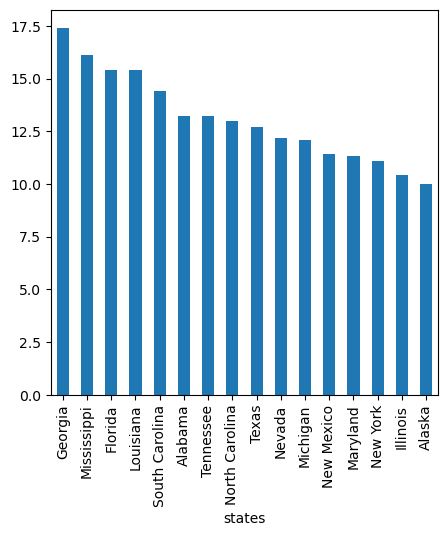

In [22]:
plt.figure(figsize=(5, 5))
crime.groupby("states")["Murder"].max().sort_values(ascending=False)[:16].plot(kind="bar")

### Observations:
- Highest Murder Rate: Georgia and Missisipi
- Lowest Murder Rate: Idaho, Iowa, Maine, New Hampshire, North dakota, Vermont and Wisconsin.

#### Assault Rate

<Axes: xlabel='states'>

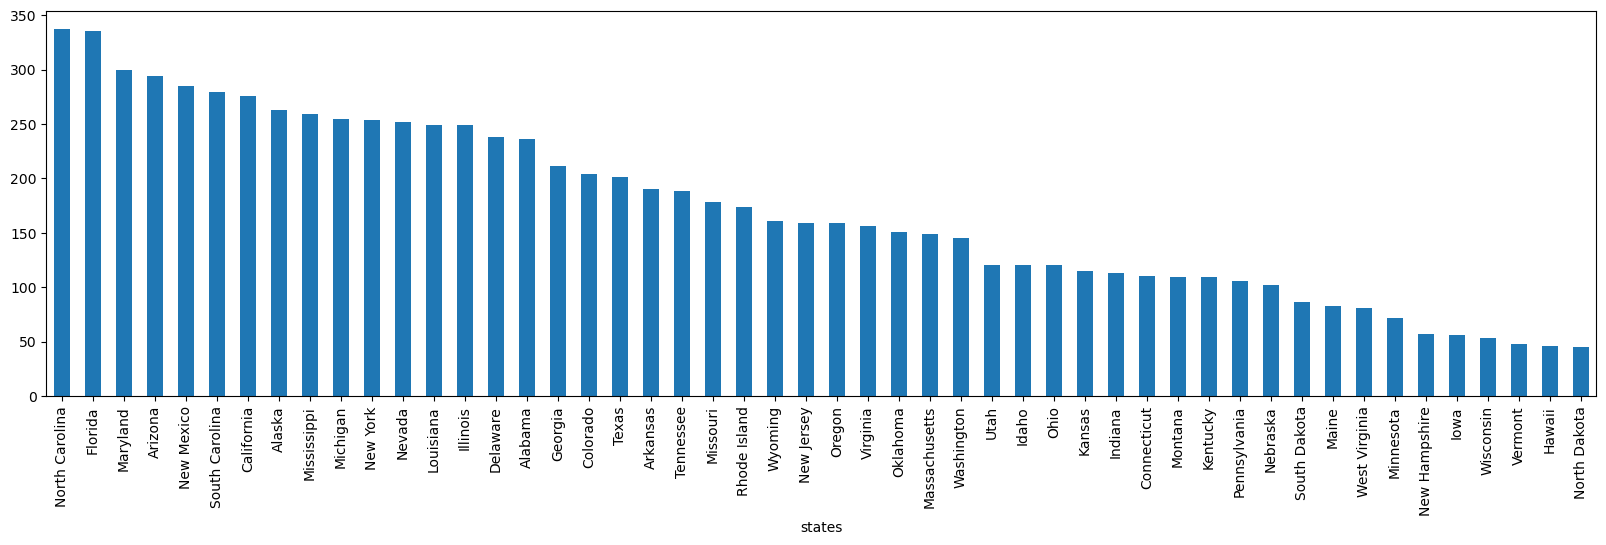

In [26]:
plt.figure(figsize=(20, 5))
crime.groupby("states")["Assault"].max().sort_values(ascending=False).plot(kind="bar")

#### Observations:

- Highest Assualt Rate: Floride and North California.
- Lowest Assualt Rate: Hawaii, North Dakota, Vermont, New Hampshire and Wisconsin.

<Axes: xlabel='states'>

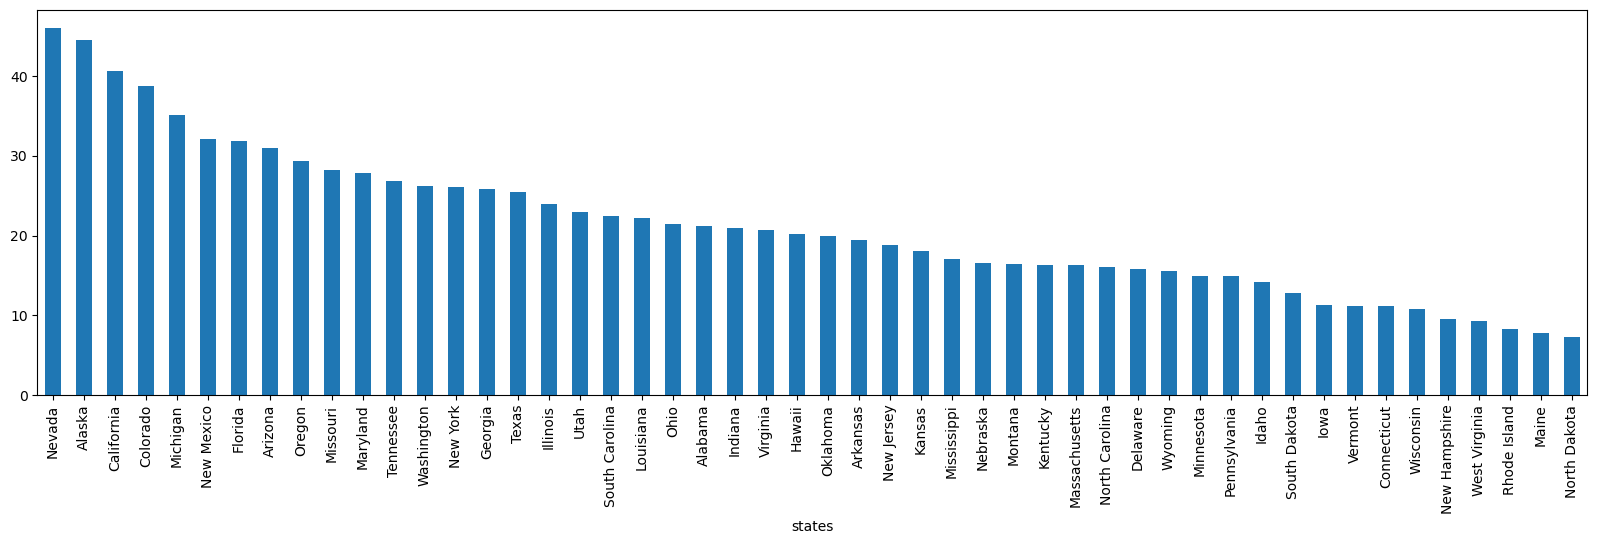

In [29]:
plt.figure(figsize=(20, 5))
crime.groupby("states")["Rape"].max().sort_values(ascending=False).plot(kind="bar")

#### Observations:

- Highest Rape Rate: Nevada and Alaska.
- Lowest Rape Rate: Maine, North Dakota, and Rhode island

In [32]:
# Transforming the dataset(Standardization)
scaler = StandardScaler()

In [34]:
scaling = crime.iloc[:, 1:]

In [36]:
scaled_data = scaler.fit_transform(scaling)

In [38]:
import seaborn as sns

In [40]:
pd.DataFrame(scaled_data, columns=scaling.columns).describe().round(3)

,Murder,Assault,UrbanPop,Rape
count,50.000,50.000,50.000,50.000
mean,-0.000,0.000,-0.000,0.000
std,1.010,1.010,1.010,1.010
min,-1.621,-1.524,-2.341,-1.503
25%,-0.861,-0.749,-0.770,-0.664
50%,-0.125,-0.143,0.032,-0.122
75%,0.803,0.948,0.852,0.533
max,2.229,2.015,1.777,2.671


In [42]:
scaling.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

## Types of Linkages:

#### 1) Single Linkage:
The distance between 2 clusters is defined as the shortest distance between points in the two clusters.

Text(0, 0.5, 'Euclidean distances')

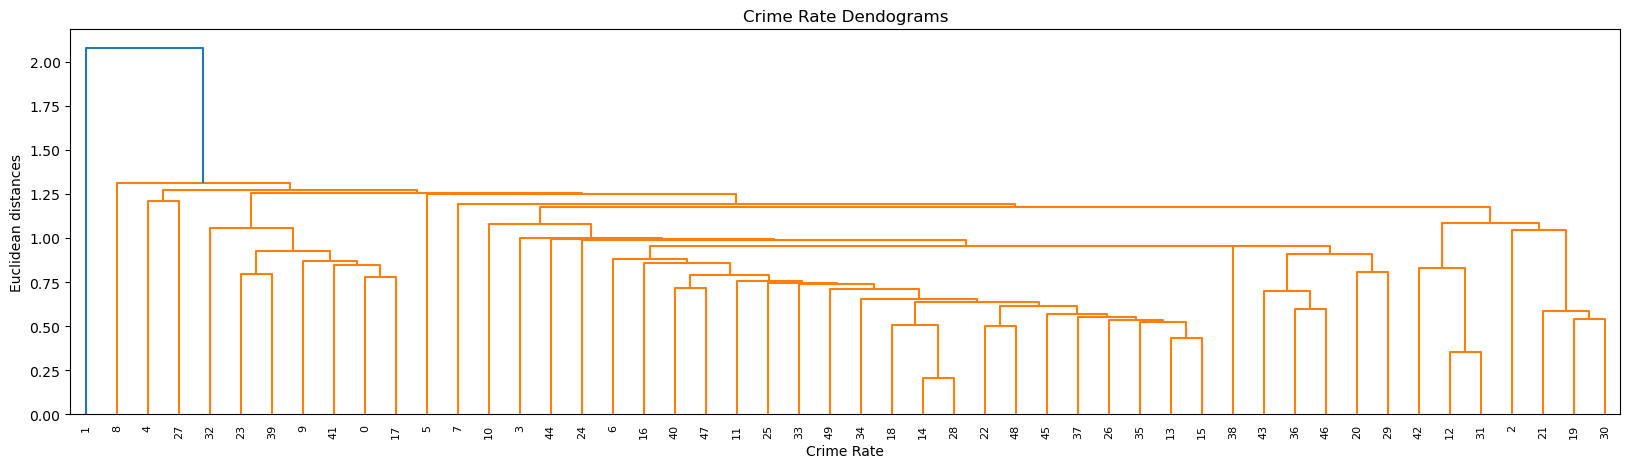

In [45]:
plt.figure(figsize=(20, 5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method="single"))
plt.xlabel("Crime Rate")
plt.ylabel("Euclidean distances")

The hierarchy class has s dendrogram method which takes the values returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters.

### 2) Complete Linkage:
The distance between 2 clusters is defined as the maximum distance between any 2 point in the clusters

Text(0, 0.5, 'Euclidean distances')

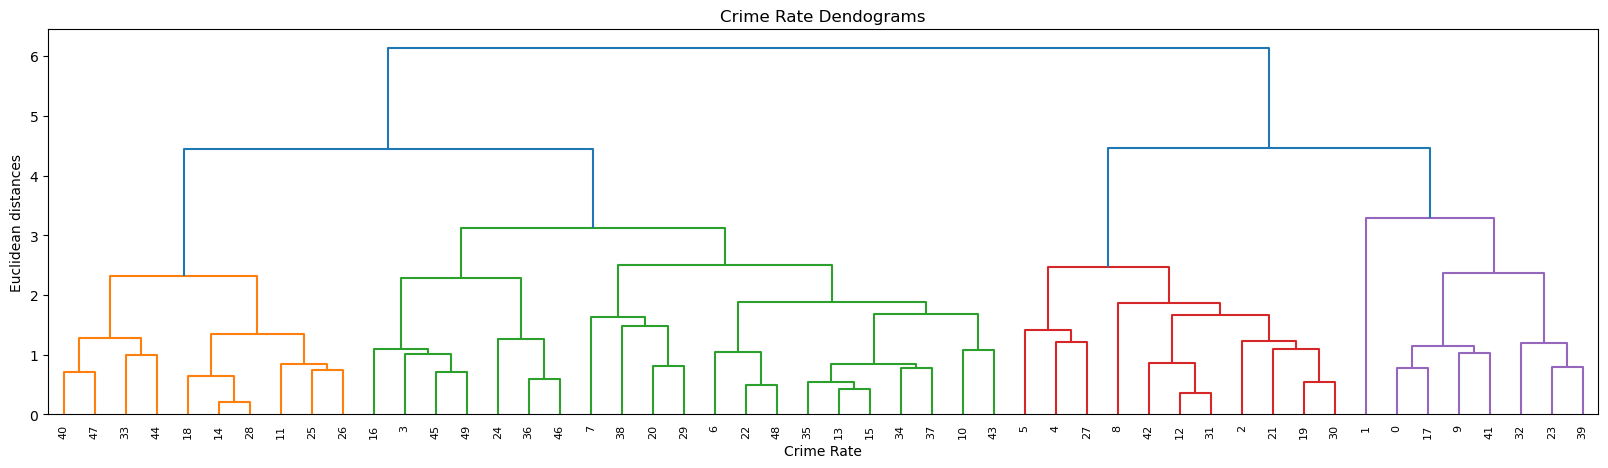

In [48]:
plt.figure(figsize=(20, 5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method="complete"))
plt.xlabel("Crime Rate")
plt.ylabel("Euclidean distances")

### 3) Average Linkage:
The distance between 2 cluster is defined as the average distance between every of one cluster to every other point of the other cluster.

Text(0, 0.5, 'Eulidean distances')

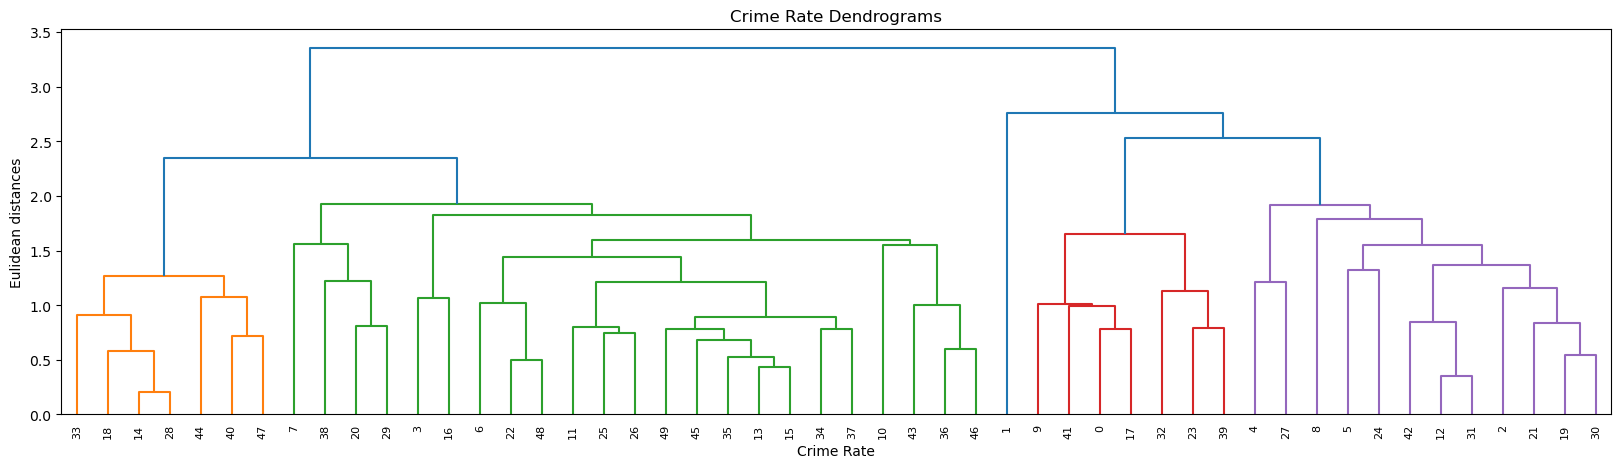

In [51]:
plt.figure(figsize=(20, 5))
plt.title("Crime Rate Dendrograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method="average"))
plt.xlabel("Crime Rate")
plt.ylabel("Eulidean distances")

The single linkage type will produce dendrograms which are not structured properly, whereas complete or average linkage will produce clusters which have a proper tree-like structure.

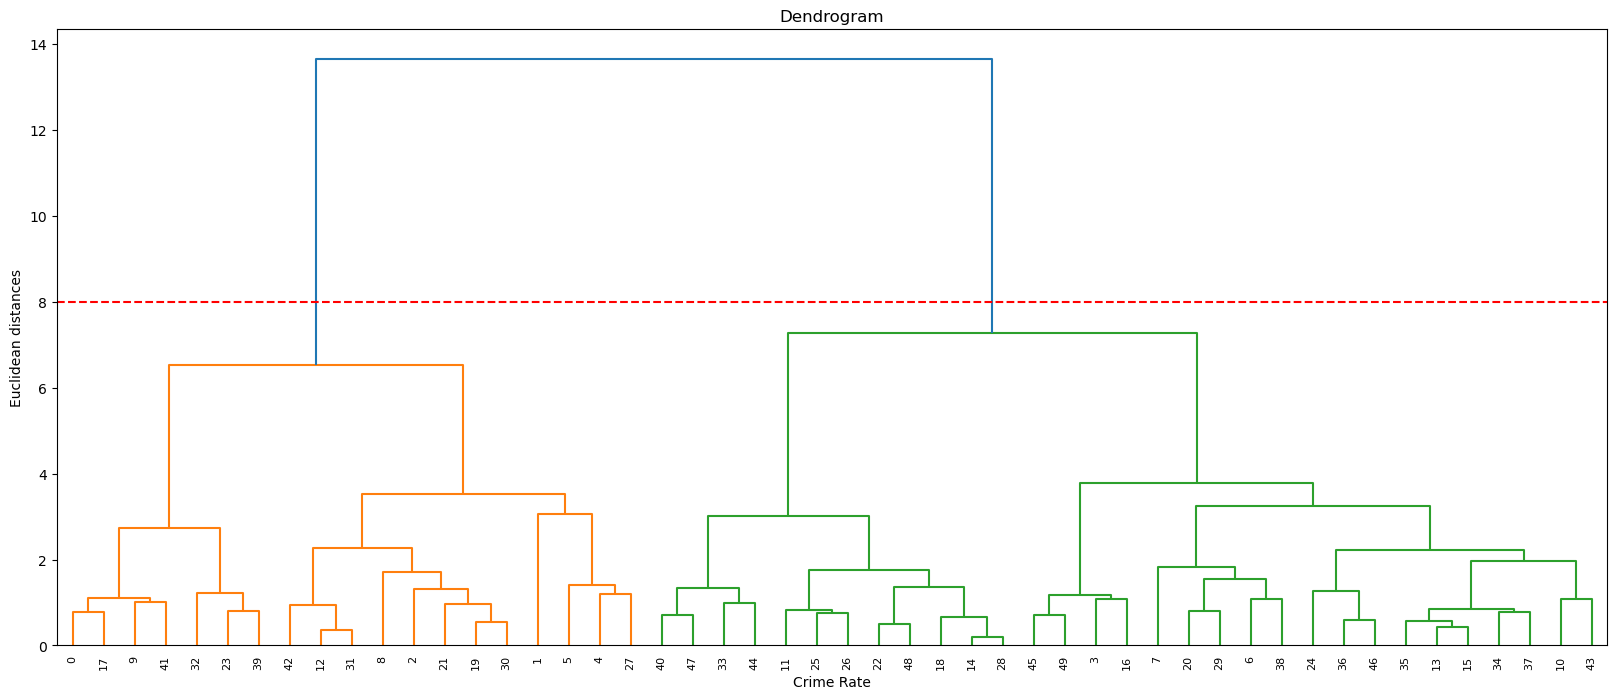

In [54]:
# with ward method
plt.figure(figsize=(20, 8))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Crime Rate")
plt.ylabel("Euclidean distances")
plt.axhline(y=8, color='r', linestyle='--')
plt.show()

### Ward method

It is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it's almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.

### How do we determine the optimal number of clusters from this diagram?

We look for the largest distance that we can see vertically without crossing any horizontal line and this one is the red framed line on the above diagram. Let's count the number of lines on the diagram and determines the oprtimal number of clusters. Cluster number will be 2 for this dataset.

In [75]:
# Fitting the Agglomerative clustering
AC = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="ward")
AC

AgglomerativeClustering()

In [77]:
# Fit and predict to have the cluster labels
y_pred = AC.fit_predict(scaled_data)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [79]:
crime["cluster labels"] = y_pred

In [81]:
# Let's see which state falls in which cluster
crime[["states", "cluster labels"]]

,states,cluster labels
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,0
4,California,1
5,Colorado,1
6,Connecticut,0
7,Delaware,0
8,Florida,1
9,Georgia,1


<Axes: xlabel='cluster labels', ylabel='Murder'>

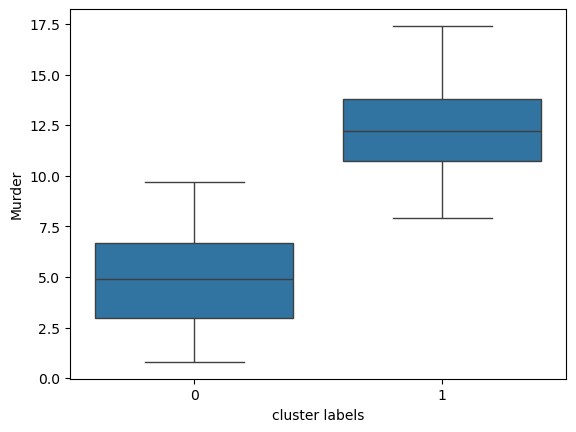

In [83]:
sns.boxplot(x="cluster labels", y="Murder", data=crime)

<Axes: xlabel='cluster labels', ylabel='Rape'>

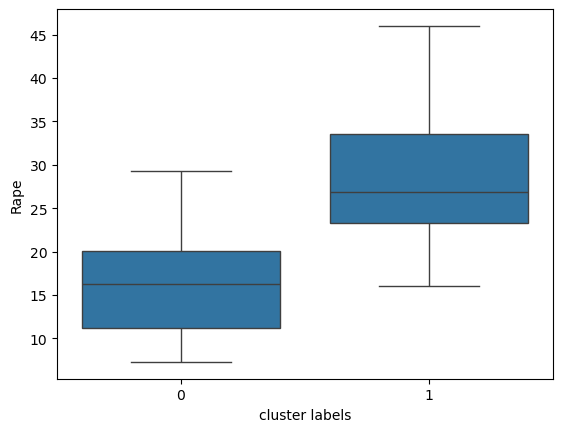

In [85]:
sns.boxplot(x="cluster labels", y="Rape", data=crime)

## Observations:

- The Cities in the Cluster-0 seems to be Safe-Zone where there are relatively less relatively less Murders, Assaults and Rapes.
- The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.



Let's display the cities in each zone now!

In [88]:
Danger_zone = crime.groupby("cluster labels")["states"].unique()[1]
Danger_zone

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado',
       'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland',
       'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina', 'Tennessee', 'Texas'],
      dtype=object)

In [90]:
safe_zone = crime.groupby("cluster labels")["states"].unique()[0]
safe_zone

array(['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Idaho',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts',
       'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire',
       'New Jersey', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [92]:
data = crime.iloc[:, 1:].values
data

array([[ 13.2, 236. ,  58. ,  21.2,   1. ],
       [ 10. , 263. ,  48. ,  44.5,   1. ],
       [  8.1, 294. ,  80. ,  31. ,   1. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ],
       [  9. , 276. ,  91. ,  40.6,   1. ],
       [  7.9, 204. ,  78. ,  38.7,   1. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ],
       [ 15.4, 335. ,  80. ,  31.9,   1. ],
       [ 17.4, 211. ,  60. ,  25.8,   1. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   0. ],
       [ 10.4, 249. ,  83. ,  24. ,   1. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   0. ],
       [  6. , 115. ,  66. ,  18. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   0. ],
       [ 15.4, 249. ,  66. ,  22.2,   1. ],
       [  2.1,  83. ,  51. ,   7.8,   0. ],
       [ 11.3, 300. ,  67. ,  27.8,   1. ],
       [  4.4, 149. ,  85. ,  16.3,   0. ],
       [ 12.1, 255. ,  74. ,  35.1,   1. ],
       [  2.7,  72. ,  66. ,  14

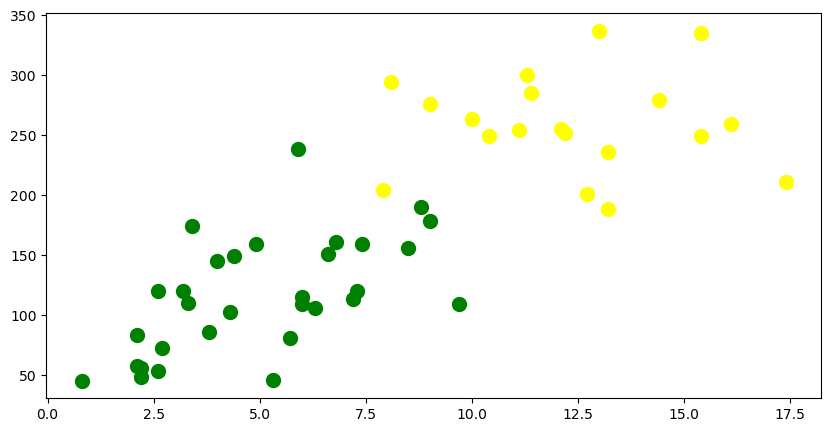

In [94]:
plt.figure(figsize=(10,5))
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=100, c='green', label ='Safe_Zone')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='yellow', label ='Danger_Zone')

In [133]:
!pip install pyfiglet

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 7.5 MB/s eta 0:00:00


In [137]:
!pip install termcolor

In [147]:
import pyfiglet
from termcolor import colored
text = pyfiglet.figlet_format("Happy Valentine's Day", font = 'slant')
print(colored(text, 'red'))

    __  __                       
   / / / /___ _____  ____  __  __
  / /_/ / __ `/ __ \/ __ \/ / / /
 / __  / /_/ / /_/ / /_/ / /_/ / 
/_/ /_/\__,_/ .___/ .___/\__, /  
           /_/   /_/    /____/   
 _    __      __           __  _           _          ____             
| |  / /___ _/ /__  ____  / /_(_)___  ___ ( )_____   / __ \____ ___  __
| | / / __ `/ / _ \/ __ \/ __/ / __ \/ _ \|// ___/  / / / / __ `/ / / /
| |/ / /_/ / /  __/ / / / /_/ / / / /  __/ (__  )  / /_/ / /_/ / /_/ / 
|___/\__,_/_/\___/_/ /_/\__/_/_/ /_/\___/ /____/  /_____/\__,_/\__, /  
                                                              /____/   



##  Dataset

Wholesale Customer Data: The data set refers to clents of a wholesale distributor. It includes the annual spending in monetary units (m.u) on diverse product categories

In [164]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [212]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Wholesale_customers_data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [170]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


array([[<Axes: title={'center': 'Channel'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Fresh'}>],
       [<Axes: title={'center': 'Milk'}>,
        <Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>, <Axes: >]], dtype=object)

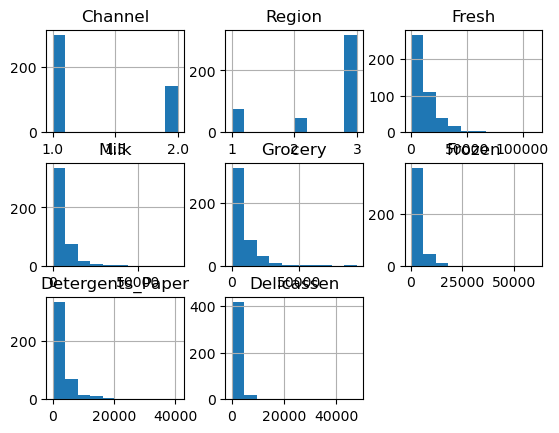

In [172]:
data.hist()

There are multiple product categories – Fresh, Milk, Grocery, etc. The values represent the number of units purchased by each client for each product. Our aim is to make clusters from this data that can segment similar clients together. We will use Hierarchical Clustering for this problem. 

# Scaling
Before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk (refer to the above table).

So, let’s first normalize the data and bring all the variables to the same scale:

In [214]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


# Creating a Dendrogram and Identifying the number of clusters
Here, we can see that the scale of all the variables is almost similar. Now, we are good to go. Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem:

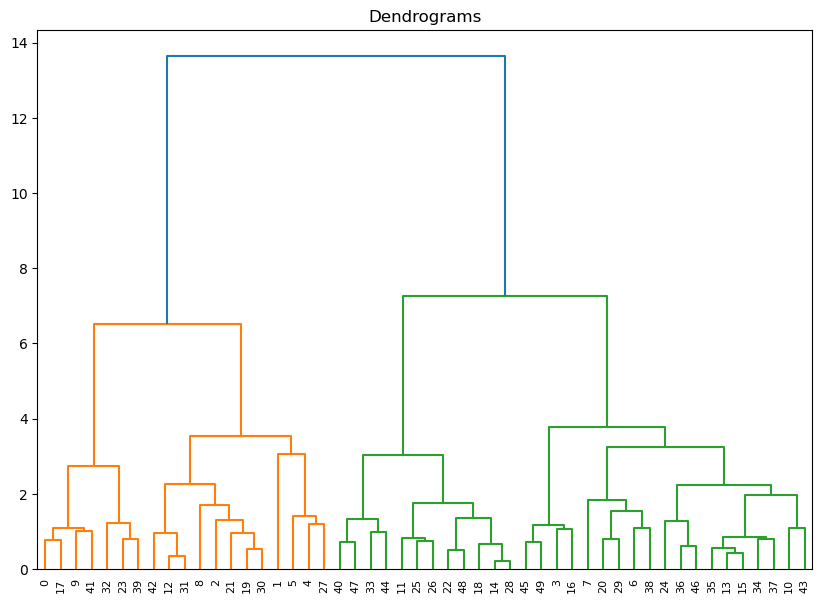

In [216]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend =sch.dendrogram(sch.linkage(scaled_data, method="ward"))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 6 and cut the dendrogram:

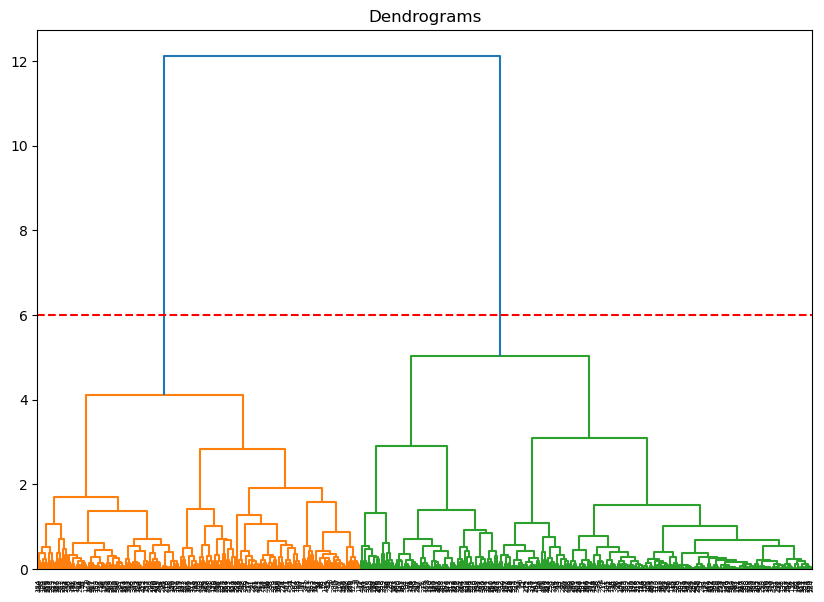

In [224]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend =sch.dendrogram(sch.linkage(data_scaled, method="ward"))
plt.axhline(y=6, color='r', linestyle='--')

we have two clusters as the line cuts the dendogram at two points. Let's now apply hierarchical clustering for 2 clisters:

### Applying hierarchical agglomerative clustering

In [220]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="ward")

In [226]:
pred_y = cluster.fit_predict(data_scaled)
pred_y.shape

(440,)

In [228]:
pred_y.shape

(440,)

In [230]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [232]:
data["cluster label"] = pred_y

In [234]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster label
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0


In [236]:
data[data["cluster label"] == 0]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster label
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
6,2,3,12126,3199,6975,480,3140,545,0
11,2,3,13146,1124,4523,1420,549,497,0
12,2,3,31714,12319,11757,287,3881,2931,0
...,...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395,0
434,1,3,16731,3922,7994,688,2371,838,0
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,0


We can see the values of 0s and 1s in the output since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 reoresents points in the second clustert. Let'snow visualize the two clusters: 

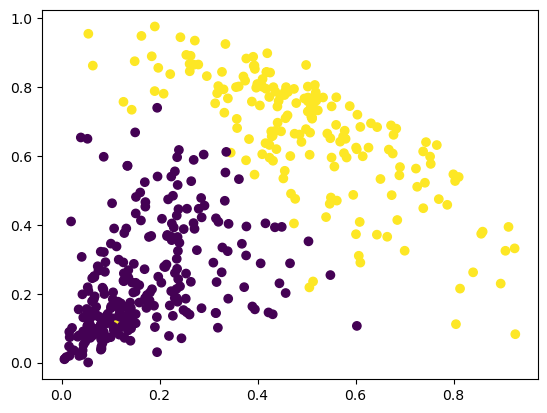

In [240]:
plt.scatter(data_scaled.Milk, data_scaled.Grocery, c= cluster.labels_)

In [244]:
cluster.labels_

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,